In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
cwd = os.getcwd()
print(cwd)

/Users/fmichaud/PycharmProjects/medeas_simulations/two_population


In [5]:
simulation_subfolder = "convergence_speed"
cwd = os.getcwd()
simulation_subfolder = os.path.join(cwd,simulation_subfolder)
Ls = [int(10**(i/4)) for i in range(7,21)] #regulary space with 4 point between each order of magnitude
Ds = [0.01]
all_distances1= [[0,0]]
sigma1 = [[0,0,0]]
for L in Ls:
    for D in Ds:
        distance_summary_file = f'all_distance/L_{L}_D_{D}.dat'
        distances  = np.loadtxt(distance_summary_file)
        for distance in distances:
           all_distances1 = np.append(all_distances1,[[L,distance[0]]],axis = 0)
        sigma_within = np.std(distances[1:,0],ddof=1)
        sigma_outside = np.sqrt(np.sum((distances[1:,0]-2*D)**2)/len(distances[1:,0]))
        sigma1 = np.append(sigma1,[[L,sigma_within, sigma_outside]],axis = 0)
        
        
all_distances2= [[0,0]]
sigma2 = [[0,0,0]]
Ds = [0.1]
for L in Ls:
    for D in Ds:
        distance_summary_file = f'all_distance/L_{L}_D_{D}.dat'
        distances = np.loadtxt(distance_summary_file)
        for distance in distances:
            all_distances2 = np.append(all_distances2,[[L,distance[0]]],axis = 0)
        sigma_within = np.std(distances[1:,0],ddof=1)
        sigma_outside = np.sqrt(np.sum((distances[1:,0]-2*D)**2)/len(distances[1:,0]))
        sigma2 = np.append(sigma2,[[L,sigma_within, sigma_outside]],axis = 0)

/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


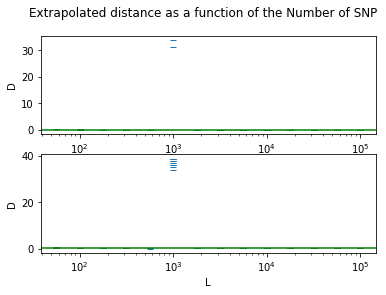

In [6]:
fig = plt.figure()
ax = fig.add_subplot(211)
ax.semilogx(all_distances1[1:,0],all_distances1[1:,1],"_")
ax.set_xlabel("L")
ax.set_ylabel("D")
ax.axhline(y=0.02,c="g")

ax = fig.add_subplot(212)
ax.semilogx(all_distances2[1:,0],all_distances2[1:,1],"_")
ax.set_xlabel("L")
ax.set_ylabel("D")
ax.axhline(y=0.2,c="g")
fig.suptitle("Extrapolated distance as a function of the Number of SNP")
plt.savefig("splitting_time_two_pop.pdf")


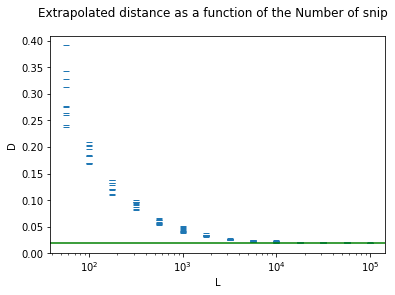

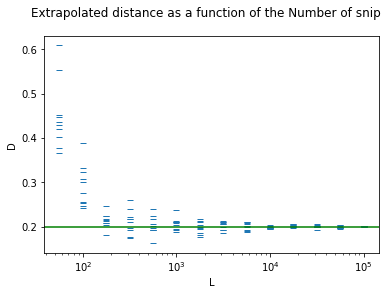

In [17]:
fig = plt.figure()

ax = fig.add_subplot(111)
#ax.set_ylim((0.08,0.2))
ax.semilogx(all_distances1[1:,0],all_distances1[1:,1],"_")
ax.set_xlabel("L")
ax.set_ylabel("D")
ax.axhline(y=0.02,c="g")

fig.suptitle("Extrapolated distance as a function of the Number of snip")
plt.savefig("convergence_D=0.1.pdf")

fig = plt.figure()

ax = fig.add_subplot(111)
#ax.set_ylim((0.08,0.2))
ax.semilogx(all_distances2[1:,0],all_distances2[1:,1],"_")
ax.set_xlabel("L")
ax.set_ylabel("D")
ax.axhline(y=0.2,c="g")

fig.suptitle("Extrapolated distance as a function of the Number of snip")
plt.savefig("convergence_D=1.pdf")

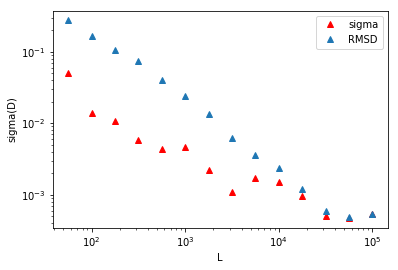

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(sigma1[1:,0],sigma1[1:,1],"r^",label="sigma")
ax.loglog(sigma1[1:,0],sigma1[1:,2],"^",label ="RMSD")
ax.legend()
ax.set_xlabel("L")
ax.set_ylabel("sigma(D)")
plt.savefig("RMSD_D=0.1.pdf")

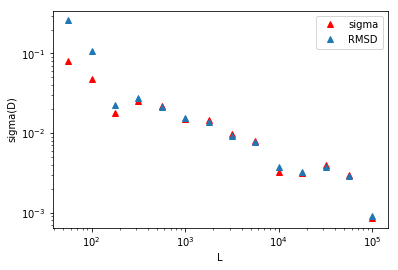

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(sigma2[1:,0],sigma2[1:,1],"r^",label="sigma")
ax.loglog(sigma2[1:,0],sigma2[1:,2],"^",label ="RMSD")
ax.legend()
ax.set_xlabel("L")
ax.set_ylabel("sigma(D)")
plt.savefig("RMSD_D=1.pdf")

/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


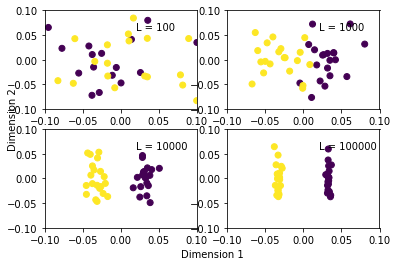

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
for iL, L in enumerate([100,1000,10000,100000]):
    val,vec = pickle.load(open(f'convergence_speed/L_{L}_D_0.01/MDS_eigensystem/p1.vecs.data',"rb"))
    ax = fig.add_subplot(2,2,iL+1)
    scale = 0.1
    ax.set_xlim([-scale,scale])
    ax.set_ylim([-scale,scale])
    ax.text(0.02,scale*0.6,f'L = {L}')
    order = np.argsort(-val)
    ax.scatter(np.sqrt(val[order[0]])*vec[:,order[0]],np.sqrt(val[order[1]])*vec[:,order[1]],c = np.concatenate((np.full(20,1),np.full(20,2))))
fig.show()
fig.savefig("PCA.pdf")


/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


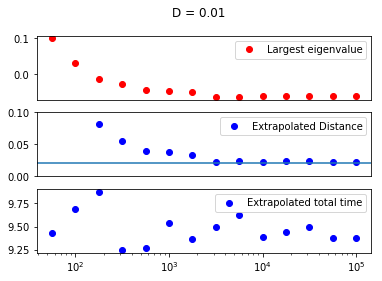

In [118]:
Ls = [int(10**(i/4)) for i in range(7,21)]
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
for ax in [ax1,ax2]:
        ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        top='off',
        bottom='off',
        labelbottom='off') # labels along the bottom edge are off)
for L in Ls:
    eigenvaluefile = os.path.join(simulation_subfolder,f'L_{L}_D_0.01',"MDS_eigensystem","p1.vecs.data")
    with open(eigenvaluefile,"rb") as f:
        val,vec = pickle.load(f)
    val = np.sort(val)
    T = np.sqrt(2*39/np.sum(val[0:-2]))
    D = np.sqrt(1+40/(2*20*20)*((T**2/2*(val[-1]))-1))-1
    ax1.semilogx(L,val[-1]-2/4.4**2,"ro",label="r")
    ax2.semilogx(L,D,"bo",label  = "D for p = 1")
    ax3.semilogx(L,T,"bo")
ax1.legend(["Largest eigenvalue"])
#ax1.set_ylim((0.,0.3))
Ls = np.array(Ls)
ax2.legend(["Extrapolated Distance"])
ax2.set_ylim((0,0.1))
ax2.axhline(y = 0.02)
ax3.legend(["Extrapolated total time"])
#ax3.set_ylim((4.3,4.7))
fig.suptitle("D = 0.01")
fig.savefig(os.path.join(simulation_subfolder,"eg_vs_distance.pdf"))

/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=100.0, right=100.0
  'left=%s, right=%s') % (left, right))


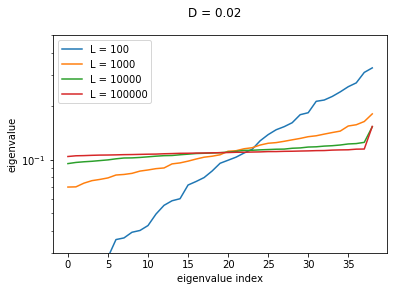

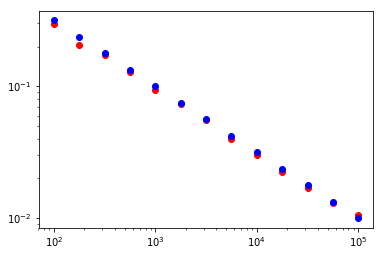

In [75]:
Ls = [int(10**(i/4)) for i in range(8,21,4)]
plt.ylim((0.03,0.5))
for L in Ls:
    eigenvaluefile = os.path.join(simulation_subfolder,f'L_{L}_D_0.01',"MDS_eigensystem","p2.vecs.data")
    with open(eigenvaluefile,"rb") as f:
        val,vec = pickle.load(f)
    val = np.sort(val)
    plt.semilogy(val[1:],label = f'L = {L}')
    ax.plot(L,val[1]-val[-2])
    
plt.xlabel("eigenvalue index")
plt.ylabel("eigenvalue")
plt.suptitle("D = 0.02")
plt.legend()
fig.savefig(os.path.join(simulation_subfolder,"eigenvalue_various_L.pdf"))

Ls = [int(10**(i/4)) for i in range(8,21)]
fig = plt.figure()
ax = fig.add_subplot(111)
for L in Ls:
    eigenvaluefile = os.path.join(simulation_subfolder,f'L_{L}_D_0.01',"MDS_eigensystem","p2.vecs.data")
    with open(eigenvaluefile,"rb") as f:
        val,vec = pickle.load(f)
    val = np.sort(val)
    ax.loglog(L,val[-2]-val[1],"or")
    ax.loglog(L,np.sqrt(40/L)/2,"ob")
    


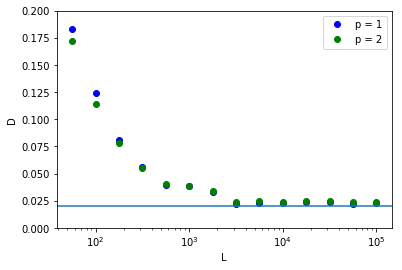

In [119]:
Ls = [int(10**(i/4)) for i in range(7,21)]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for L in Ls:
    eigenvaluefile = os.path.join(simulation_subfolder,f'L_{L}_D_0.01',"MDS_eigensystem","p1.vecs.data")
    with open(eigenvaluefile,"rb") as f:
        val,vec = pickle.load(f)
    val = np.sort(val)
    T = np.sqrt(2*39/np.sum(val[0:-2]))
    D = np.sqrt(1+40/(2*20*20)*((T**2/2*(val[-1]))-1))-1
    ax.semilogx(L,D,"bo",label  = "D for p = 1")
    eigenvaluefile = os.path.join(simulation_subfolder,f'L_{L}_D_0.01',"MDS_eigensystem","p2.vecs.data")
    with open(eigenvaluefile,"rb") as f:
        val,vec = pickle.load(f)
    val = np.sort(val)
    T = np.sqrt(2*39/np.sum(val[0:-2]))
    D = 1/20*((T**2/2*val[-1]-1))
    ax.semilogx(L,D,"go",label  = "D for p = 2")
Ls = np.array(Ls)
ax.legend(["p = 1","p = 2"])
ax.set_ylim((0,0.2))
ax.axhline(y = 0.02)
ax.set_xlabel("L")
ax.set_ylabel("D")
fig.savefig(os.path.join(simulation_subfolder,"D_various_p.pdf"))

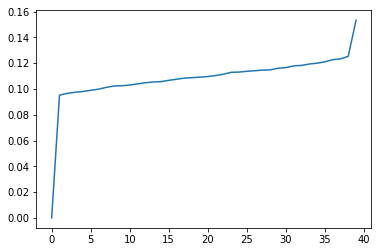

In [32]:
L  = 10000
eigenvaluefile = os.path.join(simulation_subfolder,f'L_{L}_D_0.01',"MDS_eigensystem","p2.vecs.data")
with open(eigenvaluefile,"rb") as f:
    val,vec = pickle.load(f)
    val = np.sort(val)

plt.plot(val)